In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data Extraction

In [2]:
import os
import docx
import pandas as pd
import re
import numpy 

def read_docx(file_path):
    """
    Reads the content of a .docx file.
    """
    try:
        doc = docx.Document(file_path)
        content = ""
        for paragraph in doc.paragraphs:
            content += paragraph.text + "\n"
        return content.strip()
    except Exception as e:
        print(f"An error occurred while reading {file_path}: {str(e)}")
        return None

In [3]:
def read_resume(directory):
    """
    Reads resumes from a directory and creates a DataFrame with file content, category, and file name.
    """
    file_path = []
    category = []
    file_content = []
    file_name = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".docx"):  # Only process .docx files
                print(f"Processing file: {file}")  # Debug: File being processed
                file_path.append(os.path.join(root, file))
                folder_name = os.path.basename(root)  # Extract folder name

                # Normalize folder names for categories
                if folder_name.lower() == "resumes.docx":
                    folder_name = "Peoplesoft Resume"
                elif re.search(r'\bresumes\b', folder_name, flags=re.IGNORECASE):
                    folder_name = folder_name.replace("resumes", "").strip()

                category.append(folder_name)
                file_name.append(file)

                # Read the .docx file content
                content = read_docx(os.path.join(root, file))
                file_content.append(content)

    # Create a DataFrame
    df = pd.DataFrame({
        'File': file_name,
        'Content': file_content,
        'JobPost': category
    })

    # Debug: Print DataFrame before returning
    print("Final DataFrame:")
    print(df)
    return df


# Define the correct directory path
directory = r"C:\Users\sanket\Desktop\Resume building\Resumes_Classification_1\Resumes_Classification (1)\Resumes_Docx"

# Process the resumes
data = read_resume(directory)

Processing file: Peoplesoft Admin_AnubhavSingh.docx
Processing file: Peoplesoft Admin_Murali.docx
Processing file: Peoplesoft Admin_SirazuddinMohammad.docx
Processing file: Peoplesoft Admin_Varkala Vikas.docx
Processing file: PeopleSoft DBA_Vivekanand Sayana.docx
Processing file: Peoplesoft FSCM_HariNarayana.docx
Processing file: Peoplesoft FSCM_Murali.docx
Processing file: Peoplesoft FSCM_PriyabrataHota.docx
Processing file: Peoplesoft FSCM_SUJATHA.docx
Processing file: Resume_Subha Santosh_Peoplesoft FSCM.docx
Processing file: Internship_Ravali_Musquare Technologies (1).docx
Processing file: Internship_Susovan Bag_Musquare Technologies.docx
Processing file: React Developer_Deepakreddy.docx
Processing file: React Developer_Haripriya.docx
Processing file: React Developer_Kamalakar Reddy.docx
Processing file: React Developer_Naveen sadhu.docx
Processing file: React Developer_Pragnya.docx
Processing file: React Developer_Sarala Madasu-converted.docx
Processing file: React Developer_Thiru

## Convert and save the new CSV File

In [4]:
data.to_csv('Raw_Resumes.csv',index = False)

## Understanding The data in CSV file

In [5]:
resume_data = pd.read_csv("Raw_Resumes.csv")
resume_data

,File,Content,JobPost
0,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n To work in a glob...,Peoplesoft Resume
1,Peoplesoft Admin_Murali.docx,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft Resume
2,Peoplesoft Admin_SirazuddinMohammad.docx,PROFILE SUMMARY\n\nI have overall 6.8 years’ e...,Peoplesoft Resume
3,Peoplesoft Admin_Varkala Vikas.docx,PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obje...,Peoplesoft Resume
4,PeopleSoft DBA_Vivekanand Sayana.docx,PeopleSoft Administration\n \nVivekanand Sayan...,Peoplesoft Resume
5,Peoplesoft FSCM_HariNarayana.docx,Having 4.6 years of experience in PeopleSoft a...,Peoplesoft Resume
6,Peoplesoft FSCM_Murali.docx,Having 4.6 years of experience in PeopleSoft a...,Peoplesoft Resume
7,Peoplesoft FSCM_PriyabrataHota.docx,CAREER OBJECTIVE\t\t\n\nPursuing Peoplesoft Ex...,Peoplesoft Resume
8,Peoplesoft FSCM_SUJATHA.docx,Tanna Sujatha \n\n\n\nOBJECTIVE\nSeeking a cha...,Peoplesoft Resume
9,Resume_Subha Santosh_Peoplesoft FSCM.docx,"C O N T A C T :\n\nAddress: Manyata Tech Park,...",Peoplesoft Resume


# EDA(Exploratory Data Analysis)

In [6]:
# Dataset Overview
print("Dataset Overview:")
print(f"Total Resumes: {len(resume_data)}")
print(f"Number of Categories: {resume_data['Content'].nunique()}")
print(f"Categories:\n{resume_data['JobPost'].value_counts()}")

Dataset Overview:
Total Resumes: 52
Number of Categories: 52
Categories:
JobPost
React Developer      20
SQL Developer        11
workday              11
Peoplesoft Resume    10
Name: count, dtype: int64


In [7]:
print(resume_data.columns)


Index(['File', 'Content', 'JobPost'], dtype='object')


In [8]:
#  Check for Missing Data
missing_data = resume_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_data)


Missing Values in Each Column:
File       0
Content    0
JobPost    0
dtype: int64


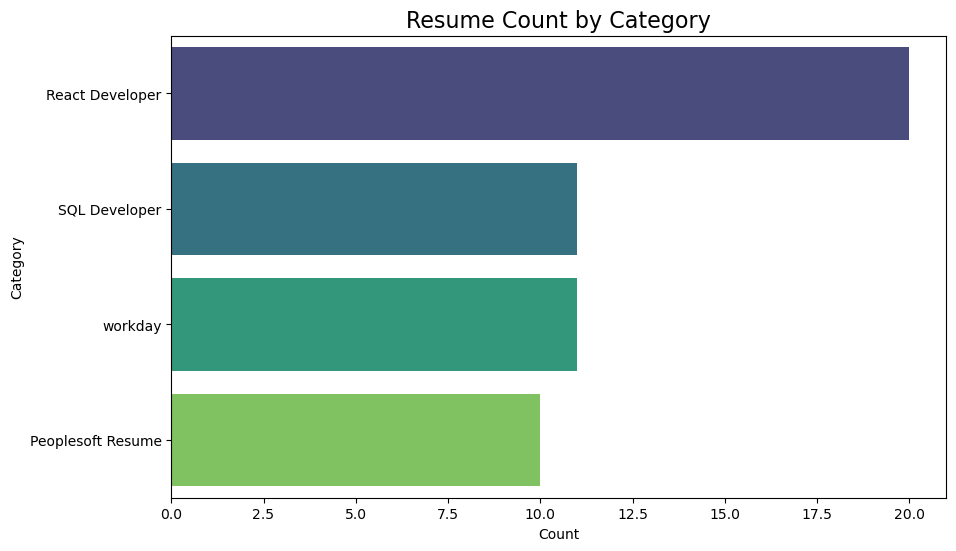

In [9]:
# 4. Visualize Resume Count by Category
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=resume_data, y='JobPost', order=resume_data['JobPost'].value_counts().index, palette='viridis')
plt.title("Resume Count by Category", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [10]:
resume_data.Content

0     Anubhav Kumar Singh\t\t\n\n  To work in a glob...
1     Murali\n\nExperience Summary \n\nI have 6 year...
2     PROFILE SUMMARY\n\nI have overall 6.8 years’ e...
3     PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obje...
4     PeopleSoft Administration\n \nVivekanand Sayan...
5     Having 4.6 years of experience in PeopleSoft a...
6     Having 4.6 years of experience in PeopleSoft a...
7     CAREER OBJECTIVE\t\t\n\nPursuing Peoplesoft Ex...
8     Tanna Sujatha \n\n\n\nOBJECTIVE\nSeeking a cha...
9     C O N T A C T :\n\nAddress: Manyata Tech Park,...
10    Name: Ravali P \n\n                           ...
11    SUSOVAN  BAG   \nSeeking  a  challenging  posi...
12    Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...
13    HARIPRIYA BATTINA \nExperience as UI Developer...
14    KAMALAKAR REDDY. A \nLinked In: https://www.li...
15    Naveen Sadhu\n\n\nTitle: software developer\t\...
16    PRAGNYA PATTNAIK\n \n \n \n Expertise: \n \nHa...
17     204,Sri geethika prestige,road number 10

## Additional Descriptive Statistics

In [11]:
# Overview of data
print("Dataset Info:")
resume_data.info()

# Basic statistics
print("Descriptive Statistics:")
print(resume_data.describe())

# Unique categories in 'JobPost'
print("\nUnique JobPost Categories:")
print(resume_data['JobPost'].value_counts())

# Check duplicates
duplicates = resume_data.duplicated(subset=['Content']).sum()
print(f"\nNumber of duplicate resumes: {duplicates}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   File     52 non-null     object
 1   Content  52 non-null     object
 2   JobPost  52 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB
Descriptive Statistics:
                                      File  \
count                                   52   
unique                                  52   
top     Peoplesoft Admin_AnubhavSingh.docx   
freq                                     1   

                                                  Content          JobPost  
count                                                  52               52  
unique                                                 52                4  
top     Anubhav Kumar Singh\t\t\n\n  To work in a glob...  React Developer  
freq                                                    1               20  

Unique JobPost Cat

## Distribution of Words and Character Count

In [12]:
# Calculate word count for the 'Content' column
resume_data['Word_count'] = resume_data['Content'].apply(lambda x: len(str(x).split()) if x else 0)

# Display the 'Content' and 'Word_count' columns
print(resume_data[['Content', 'Word_count']].head())


                                             Content  Word_count
0  Anubhav Kumar Singh\t\t\n\n  To work in a glob...         934
1  Murali\n\nExperience Summary \n\nI have 6 year...         528
2  PROFILE SUMMARY\n\nI have overall 6.8 years’ e...         505
3  PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obje...         964
4  PeopleSoft Administration\n \nVivekanand Sayan...        2038


In [13]:
resume_data['char_count'] = resume_data['Content'].str.len()
print(resume_data[['Content', 'char_count']].head())

                                             Content  char_count
0  Anubhav Kumar Singh\t\t\n\n  To work in a glob...        7236
1  Murali\n\nExperience Summary \n\nI have 6 year...        3981
2  PROFILE SUMMARY\n\nI have overall 6.8 years’ e...        3629
3  PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obje...        7264
4  PeopleSoft Administration\n \nVivekanand Sayan...       15339


## Job Post Distribution

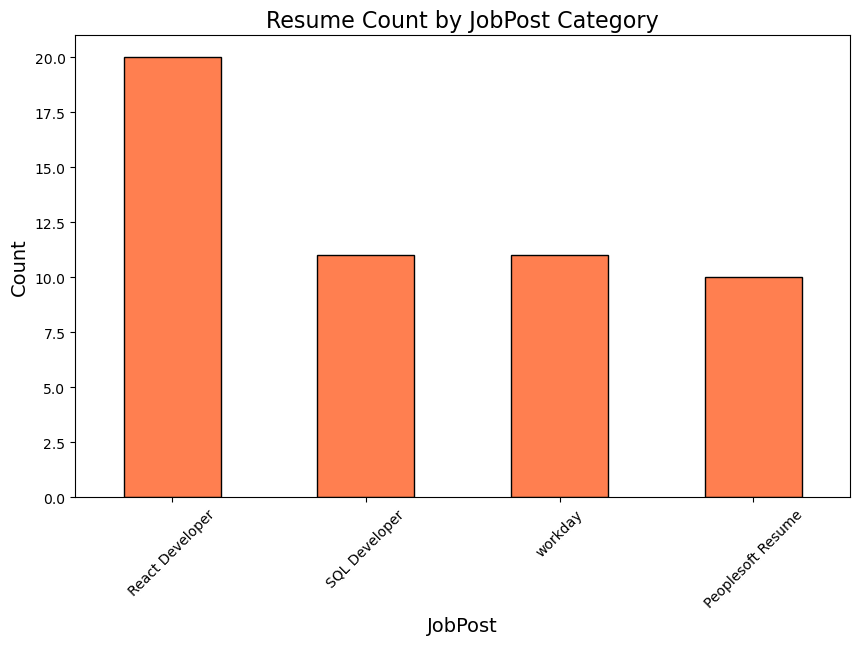

In [14]:
# Bar plot of resume count by category
plt.figure(figsize=(10, 6))
resume_data['JobPost'].value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.title("Resume Count by JobPost Category", fontsize=16)
plt.xlabel("JobPost", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()



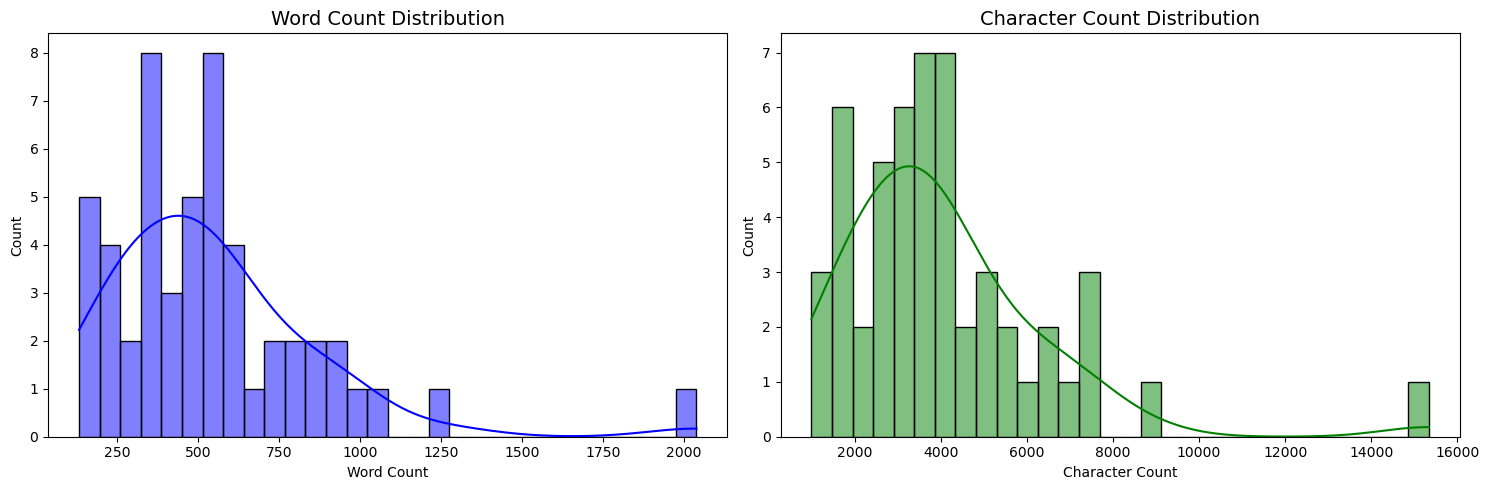

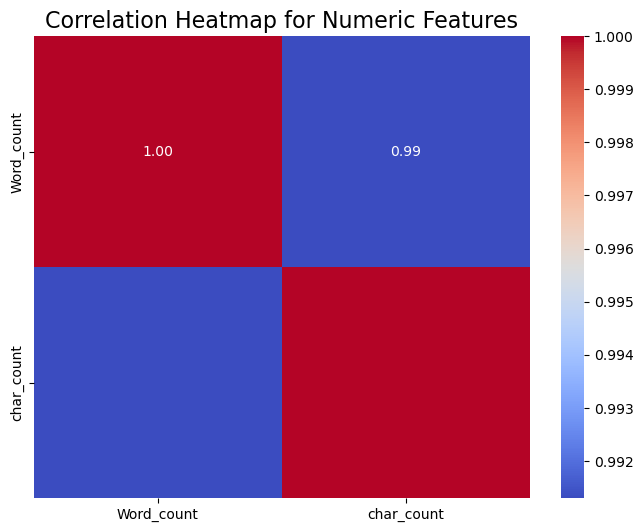

In [15]:
# 5. Distribution of Word and Character Counts
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Word count distribution
sns.histplot(resume_data['Word_count'], bins=30, kde=True, ax=ax[0], color='blue')
ax[0].set_title("Word Count Distribution", fontsize=14)
ax[0].set_xlabel("Word Count")

# Character count distribution
sns.histplot(resume_data['char_count'], bins=30, kde=True, ax=ax[1], color='green')
ax[1].set_title("Character Count Distribution", fontsize=14)
ax[1].set_xlabel("Character Count")

plt.tight_layout()
plt.show()

# 6. Correlation Heatmap
numeric_features = ['Word_count', 'char_count']
correlation_matrix = resume_data[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numeric Features", fontsize=16)
plt.show()

## Text Pre-processing

### using Regular expression

In [16]:
import re
from nltk.tokenize import RegexpTokenizer

def preprocess(sentence):
    # Ensure input is a string
    sentence = str(sentence)
    # Replace specific patterns
    sentence = sentence.replace('(html)', "")
    # Remove HTML tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    # Remove URLs
    rem_url = re.sub(r'http\S+', '', cleantext)
    # Remove numbers
    rem_num = re.sub(r'[0-9]+', '', rem_url)
    # Tokenize text to remove punctuations
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    # Join tokens back to form a clean sentence
    cleaned_sentence = ' '.join(tokens)
    return cleaned_sentence

## Final Clean Text from Resume

In [17]:
# Apply preprocessing to the 'Content' column
resume_data['Content'] = resume_data['Content'].apply(preprocess)

# Display the first few rows
print(resume_data.head())

                                       File  \
0        Peoplesoft Admin_AnubhavSingh.docx   
1              Peoplesoft Admin_Murali.docx   
2  Peoplesoft Admin_SirazuddinMohammad.docx   
3       Peoplesoft Admin_Varkala Vikas.docx   
4     PeopleSoft DBA_Vivekanand Sayana.docx   

                                             Content            JobPost  \
0  Anubhav Kumar Singh To work in a globally comp...  Peoplesoft Resume   
1  Murali Experience Summary I have years of expe...  Peoplesoft Resume   
2  PROFILE SUMMARY I have overall years experienc...  Peoplesoft Resume   
3  PeopleSoft Admin VARKALA VIKAS Career Objectiv...  Peoplesoft Resume   
4  PeopleSoft Administration Vivekanand Sayana Ca...  Peoplesoft Resume   

   Word_count  char_count  
0         934        7236  
1         528        3981  
2         505        3629  
3         964        7264  
4        2038       15339  


In [18]:
resume_data

,File,Content,JobPost,Word_count,char_count
0,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh To work in a globally comp...,Peoplesoft Resume,934,7236
1,Peoplesoft Admin_Murali.docx,Murali Experience Summary I have years of expe...,Peoplesoft Resume,528,3981
2,Peoplesoft Admin_SirazuddinMohammad.docx,PROFILE SUMMARY I have overall years experienc...,Peoplesoft Resume,505,3629
3,Peoplesoft Admin_Varkala Vikas.docx,PeopleSoft Admin VARKALA VIKAS Career Objectiv...,Peoplesoft Resume,964,7264
4,PeopleSoft DBA_Vivekanand Sayana.docx,PeopleSoft Administration Vivekanand Sayana Ca...,Peoplesoft Resume,2038,15339
5,Peoplesoft FSCM_HariNarayana.docx,Having years of experience in PeopleSoft appli...,Peoplesoft Resume,389,2946
6,Peoplesoft FSCM_Murali.docx,Having years of experience in PeopleSoft appli...,Peoplesoft Resume,385,2916
7,Peoplesoft FSCM_PriyabrataHota.docx,CAREER OBJECTIVE Pursuing Peoplesoft Executive...,Peoplesoft Resume,515,3477
8,Peoplesoft FSCM_SUJATHA.docx,Tanna Sujatha OBJECTIVE Seeking a challenging ...,Peoplesoft Resume,371,2732
9,Resume_Subha Santosh_Peoplesoft FSCM.docx,C O N T A C T Address Manyata Tech Park Nagava...,Peoplesoft Resume,393,2092


## Save the clean data to new dataframe

In [19]:
cleaned_data = resume_data

In [20]:
cleaned_data

,File,Content,JobPost,Word_count,char_count
0,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh To work in a globally comp...,Peoplesoft Resume,934,7236
1,Peoplesoft Admin_Murali.docx,Murali Experience Summary I have years of expe...,Peoplesoft Resume,528,3981
2,Peoplesoft Admin_SirazuddinMohammad.docx,PROFILE SUMMARY I have overall years experienc...,Peoplesoft Resume,505,3629
3,Peoplesoft Admin_Varkala Vikas.docx,PeopleSoft Admin VARKALA VIKAS Career Objectiv...,Peoplesoft Resume,964,7264
4,PeopleSoft DBA_Vivekanand Sayana.docx,PeopleSoft Administration Vivekanand Sayana Ca...,Peoplesoft Resume,2038,15339
5,Peoplesoft FSCM_HariNarayana.docx,Having years of experience in PeopleSoft appli...,Peoplesoft Resume,389,2946
6,Peoplesoft FSCM_Murali.docx,Having years of experience in PeopleSoft appli...,Peoplesoft Resume,385,2916
7,Peoplesoft FSCM_PriyabrataHota.docx,CAREER OBJECTIVE Pursuing Peoplesoft Executive...,Peoplesoft Resume,515,3477
8,Peoplesoft FSCM_SUJATHA.docx,Tanna Sujatha OBJECTIVE Seeking a challenging ...,Peoplesoft Resume,371,2732
9,Resume_Subha Santosh_Peoplesoft FSCM.docx,C O N T A C T Address Manyata Tech Park Nagava...,Peoplesoft Resume,393,2092


In [21]:
cleaned_data.Content[4]

'PeopleSoft Administration Vivekanand Sayana Career Objective With my valid expertise of years in PeopleSoft I hope to enhance my skill set while adding value to the business to enable implementation of solutions which aid the company s objectives understanding and anticipating the needs interests and motivations of the clients and to deliver on time budget and to quality delivering value through improving agility quality and reliability Professional Summary Over years of experience in PeopleSoft implementation Support configuration migrations maintenance and administration of Application Server Domains Process Scheduler Servers Web Server Domains PeopleTools Upgrades Application Updates PUM SES and Elastic Search Experience in integration activities between various PeopleSoft Financials HRMS EPM and FSCM environments Extensively involved in resolving Performance issues Experience in driving Infrastructure Hardware Upgrades Disaster Recovery Activities Experience in Health Check for al

## Named Entity Recognition(NER)

In [22]:
import nltk
import string
from nltk.corpus import stopwords

# Load stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Define an enhanced stopword set
oneSetOfStopWords = set(stopwords.words('english') + ["''", '""', '``'])

# Initialize variables
totalWords = []
Sentences = cleaned_data['Content'].values  # Assuming 'cleaned_data' contains the cleaned Content column
cleanedSentences = ""

# Process each sentence
for records in Sentences:
    cleanedText = preprocess(records)  # Assuming preprocess is defined to clean the text
    cleanedSentences += cleanedText + " "
    requiredWords = nltk.word_tokenize(cleanedText)  # Tokenize the cleaned text
    for word in requiredWords:
        # Filter out stopwords and punctuation
        if word.lower() not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

# Compute word frequency distribution
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)

# Print the 50 most common words
print(mostcommon)


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


[('using', 236), ('SQL', 168), ('Experience', 159), ('Workday', 153), ('PeopleSoft', 149), ('experience', 134), ('Application', 124), ('Project', 119), ('data', 119), ('Server', 112), ('business', 110), ('React', 107), ('various', 93), ('like', 93), ('knowledge', 91), ('reports', 90), ('Involved', 82), ('HCM', 77), ('Good', 77), ('Reports', 74), ('Web', 71), ('Worked', 70), ('process', 67), ('system', 67), ('working', 65), ('creating', 65), ('HTML', 64), ('Developer', 63), ('application', 62), ('Responsibilities', 62), ('EIB', 62), ('People', 60), ('support', 59), ('new', 59), ('Created', 59), ('JS', 58), ('CSS', 56), ('issues', 55), ('integrations', 55), ('requirement', 54), ('Process', 53), ('Role', 52), ('Tools', 52), ('web', 52), ('Developed', 52), ('etc', 50), ('team', 50), ('server', 50), ('years', 49), ('skills', 49)]


## Part Of Speech(POS) tagging

In [23]:
import spacy
from spacy import displacy  # For visualizations

# Load spaCy's large English model
nlp = spacy.load('en_core_web_md')

# Extract a slice of text for processing
one_block = cleanedSentences[1300:5200]

# Process the text
doc_block = nlp(one_block)

# Render the visualization in a Jupyter notebook
displacy.render(doc_block, style='ent', jupyter=True)


## Filtering out the Nouns and Verbs from the Text to Tokens

In [24]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[0:250])

['work', 'environment', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'production', 'environments', 'support', 'environments', 'installed', 'OS', 'Involved', 'Day', 'activities', 'admin', 'changes', 'Tax', 'updates', 'Troubleshooting', 'servers', 'application', 'servers', 'CPU', 'patches', 'applications', 'Working', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'troubleshooting', 'tier', 'setup', 'requirement', 'reported', 'remediation', 'vulnerability', 'report', 'team', 'Worked', 'installation', 'Developing', 'scripts', 'troubleshooting', 'failures', 'premises', 'Worked', 'scripting', 'application', 'requirement', 'automated', 'start', 'stop', 'activities', 'application', 'knowledge', 'certificates', 'released', 'applications', 'Worked', 'Gained', 'knowledge', 'AWS', 'Resources', 'understanding', 'architecture', 'Command', 'trouble', 'shooting', 'platform', 'using', 'experience', 'job', 'scheduling', 'Having', 'knowledge

## Counting all the Nouns and Verbs present in the Tokens of words

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer

cv = CountVectorizer()

# Fit and transform the data
X = cv.fit_transform(nouns_verbs)

# Sum the occurrences of each word
sum_words = X.sum(axis=0)

# Get word frequencies
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

# Sort words by frequency
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,using,241
1,experience,195
2,data,120
3,reports,113
4,business,111
5,web,94
6,involved,93
7,knowledge,93
8,creating,90
9,worked,84


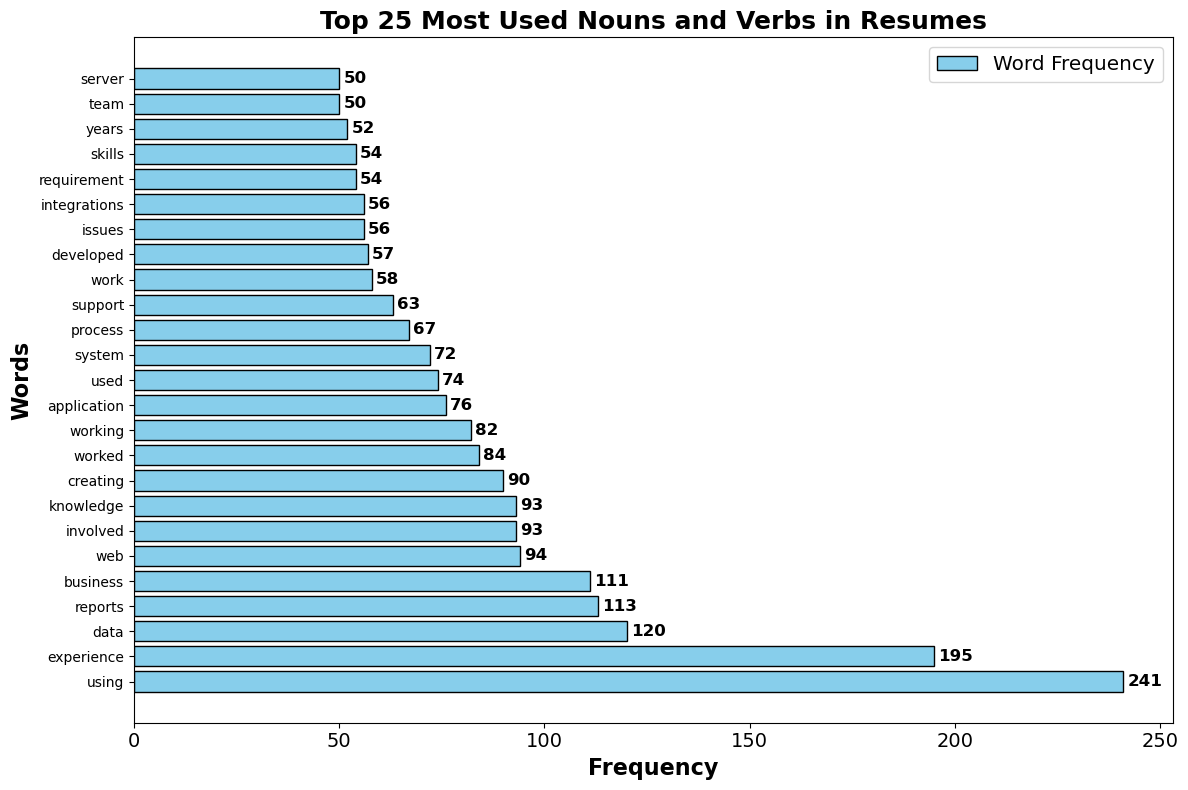

In [26]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Sample Data (replace with your actual top 25 data)
top_words = wd_df.head(25)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot
bars = ax.barh(top_words['Words'], top_words['Count'], color='skyblue', edgecolor='black')

# Customizing the axes
ax.set_xlabel('Frequency', fontsize=16, fontweight='bold')
ax.set_ylabel('Words', fontsize=16, fontweight='bold')

# Rotate x-axis ticks (not relevant for horizontal bar chart, can skip or adjust for other plots)
plt.xticks(fontsize=14)

# Adding legend
plt.legend(['Word Frequency'], loc='best', fontsize='x-large')

# Title
plt.title('Top 25 Most Used Nouns and Verbs in Resumes', fontsize=18, fontweight='bold')

# Adjusting rcParams
rcParams = {
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.labelsize': 16,
}
pylab.rcParams.update(rcParams)

# Adding labels to bars
for bar in bars:
    width = bar.get_width()  # Get bar width (frequency count in this case)
    ax.text(
        width + 1,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically
        f'{int(width)}',  # The text to display (frequency count)
        ha='left', va='center', fontsize=12, color='black', fontweight='bold'
    )

# Tight layout for better spacing
fig.tight_layout()

# Show plot
plt.show()

# Save figure to a file
#fig.savefig('resume_data/ING/Top_Nouns_Verbs_Part1.png', dpi=500)


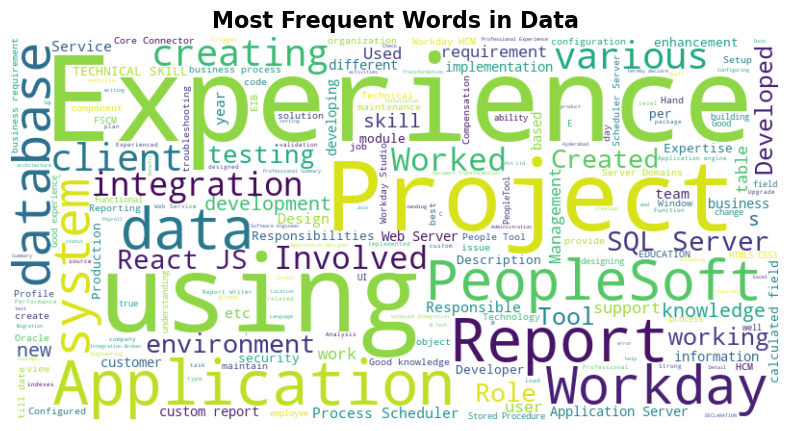

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(data['Content'].dropna())

# Create the WordCloud object
word_cloud = WordCloud(
    width=800,             # Width of the canvas
    height=400,            # Height of the canvas
    background_color='white', # Background color
    colormap='viridis',       # Color map for words
               
).generate(text_data)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')  # Smooth rendering
plt.axis('off')  # Hide axes
plt.title('Most Frequent Words in Data', fontsize=16, fontweight='bold')  # Add a title
plt.tight_layout

# Show the plot
plt.show()




## Model Building

## 1.RandomForestClassifier

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
# Assuming 'Content' contains cleaned text and 'JobPost' is the target
X = cleaned_data['Content']  # Feature: Text data
y = cleaned_data['JobPost']  # Target: Job categories

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
#Convert text data to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to prevent overfitting
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [30]:
#Train a classifier (Random Forest as an example)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

In [31]:
#Evaluate the model
y_pred = clf.predict(X_test_tfidf)
y_pred

array(['React Developer', 'workday', 'workday', 'React Developer',
       'workday', 'Peoplesoft Resume', 'React Developer', 'workday',
       'Peoplesoft Resume', 'SQL Developer', 'React Developer'],
      dtype=object)

In [32]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         2
  React Developer       1.00      1.00      1.00         4
    SQL Developer       1.00      1.00      1.00         1
          workday       1.00      1.00      1.00         4

         accuracy                           1.00        11
        macro avg       1.00      1.00      1.00        11
     weighted avg       1.00      1.00      1.00        11

Accuracy Score: 1.0


In [33]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model on the training set
y_train_pred = clf.predict(X_train_tfidf)

print("Training Set Performance:")
print("Classification Report:\n", classification_report(y_train, y_train_pred))
print("Accuracy Score (Training):", accuracy_score(y_train, y_train_pred))


Training Set Performance:
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         8
  React Developer       1.00      1.00      1.00        16
    SQL Developer       1.00      1.00      1.00        10
          workday       1.00      1.00      1.00         7

         accuracy                           1.00        41
        macro avg       1.00      1.00      1.00        41
     weighted avg       1.00      1.00      1.00        41

Accuracy Score (Training): 1.0


In [34]:
# Evaluate the model on the test set
y_test_pred = clf.predict(X_test_tfidf)

print("\nTest Set Performance:")
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Accuracy Score (Test):", accuracy_score(y_test, y_test_pred))



Test Set Performance:
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         2
  React Developer       1.00      1.00      1.00         4
    SQL Developer       1.00      1.00      1.00         1
          workday       1.00      1.00      1.00         4

         accuracy                           1.00        11
        macro avg       1.00      1.00      1.00        11
     weighted avg       1.00      1.00      1.00        11

Accuracy Score (Test): 1.0


In [35]:
# Compare the results
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nPerformance Comparison:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

if train_accuracy - test_accuracy > 0.1:
    print("\nWarning: The model may be overfitting!")
else:
    print("\nThe model generalizes well to the test set.")



Performance Comparison:
Training Accuracy: 1.00
Test Accuracy: 1.00

The model generalizes well to the test set.


## 2.naive_bayes

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare the data
# Assuming 'Content' contains the cleaned text and 'JobPost' is the target variable
X = cleaned_data['Content']  # Feature: Text data
y = cleaned_data['JobPost']  # Target: Job categories

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Step 2: Convert text data to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit features for better generalization
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [38]:
# Step 3: Train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [39]:
# Evaluate the model
# Predict on the test set
y_test_pred = nb_model.predict(X_test_tfidf)
y_test_pred

array(['React Developer', 'workday', 'workday', 'React Developer',
       'workday', 'Peoplesoft Resume', 'React Developer', 'workday',
       'Peoplesoft Resume', 'React Developer', 'React Developer'],
      dtype='<U17')

In [40]:
# Classification Report
print("Test Set Performance:")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy Score
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Test Set Performance:
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         2
  React Developer       0.80      1.00      0.89         4
    SQL Developer       0.00      0.00      0.00         1
          workday       1.00      1.00      1.00         4

         accuracy                           0.91        11
        macro avg       0.70      0.75      0.72        11
     weighted avg       0.84      0.91      0.87        11

Test Accuracy: 0.9090909090909091


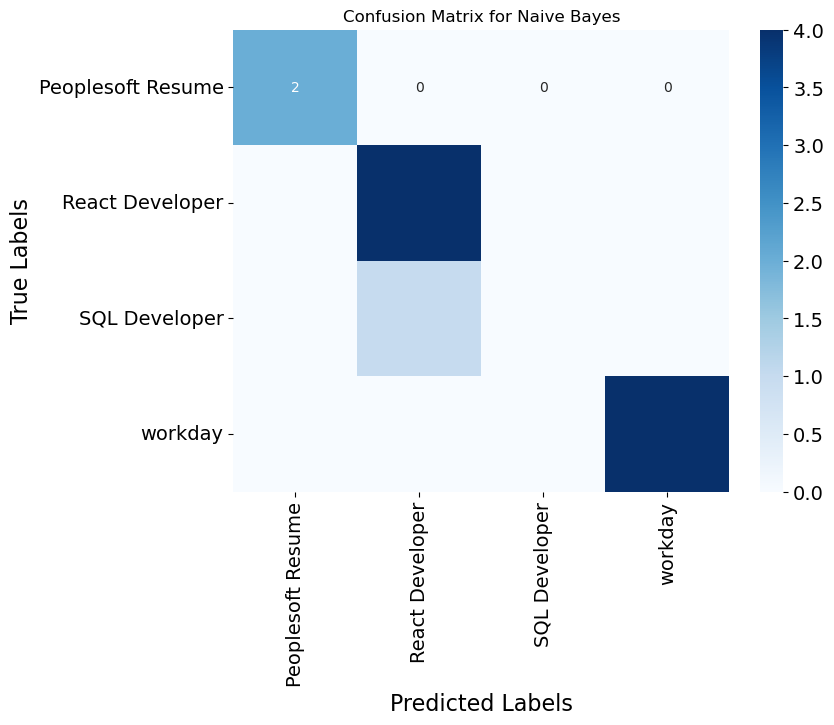

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


In [42]:
# Save the model and vectorizer
import joblib
joblib.dump(nb_model, 'naive_bayes_resume_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


#  Prepare the data
# Assuming 'Content' contains the cleaned text and 'JobPost' is the target variable
X = cleaned_data['Content']  # Feature: Text data
y = cleaned_data['JobPost']  # Target: Job categories

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
#  Convert text data to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit features for better generalization
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [45]:
# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=200, random_state=42)

In [46]:
# Evaluate the model
# Predict on the test set
y_test_pred = lr_model.predict(X_test_tfidf)
y_test_pred

array(['React Developer', 'workday', 'workday', 'React Developer',
       'workday', 'Peoplesoft Resume', 'React Developer', 'workday',
       'Peoplesoft Resume', 'React Developer', 'React Developer'],
      dtype=object)

In [47]:
# Classification Report
print("Test Set Performance:")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy Score
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Test Set Performance:
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         2
  React Developer       0.80      1.00      0.89         4
    SQL Developer       0.00      0.00      0.00         1
          workday       1.00      1.00      1.00         4

         accuracy                           0.91        11
        macro avg       0.70      0.75      0.72        11
     weighted avg       0.84      0.91      0.87        11

Test Accuracy: 0.9090909090909091


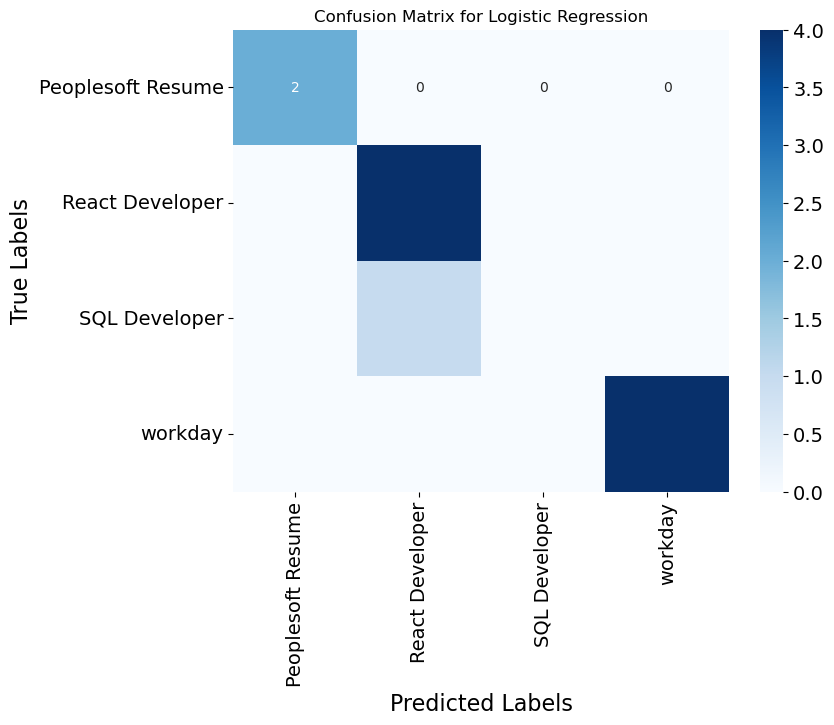

In [48]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [62]:
#Save the model and vectorizer
import joblib
joblib.dump(lr_model, 'lr_model.joblib')
joblib.dump(tfidf, 'tfidf.joblib')

['tfidf.joblib']

## 4.SVM( (Support Vector Classifier))

In [50]:
from sklearn.svm import SVC

#Prepare the data
# Assuming 'Content' contains the cleaned text and 'JobPost' is the target variable
X = cleaned_data['Content']  # Feature: Text data
y = cleaned_data['JobPost']  # Target: Job categories

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#Convert text data to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit features for better generalization
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [52]:
#Train the SVM classifier
svm_model = SVC(kernel='linear', C=1, random_state=42)  # Linear kernel for text classification
svm_model.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [53]:
# Evaluate the model
# Predict on the test set
y_test_pred = svm_model.predict(X_test_tfidf)
y_test_pred

array(['React Developer', 'workday', 'workday', 'React Developer',
       'workday', 'Peoplesoft Resume', 'React Developer', 'workday',
       'Peoplesoft Resume', 'SQL Developer', 'React Developer'],
      dtype=object)

In [56]:
# Classification Report
print("Test Set Performance:")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Accuracy Score
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Set Performance:
Classification Report:
                    precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         2
  React Developer       1.00      1.00      1.00         4
    SQL Developer       1.00      1.00      1.00         1
          workday       1.00      1.00      1.00         4

         accuracy                           1.00        11
        macro avg       1.00      1.00      1.00        11
     weighted avg       1.00      1.00      1.00        11

Test Accuracy: 1.0


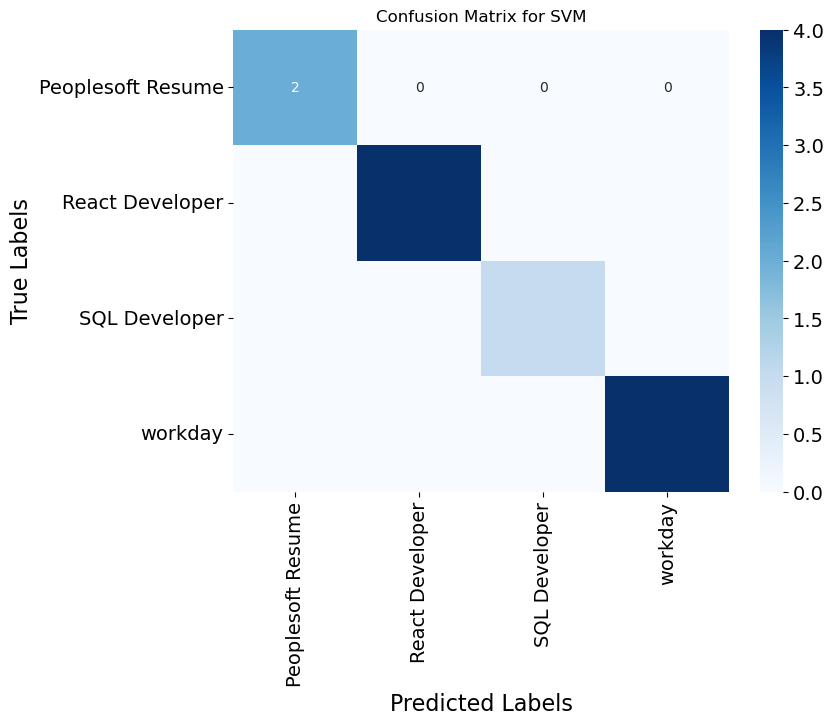

In [57]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()